# MNIST Database Analysis
# Created By: Michael Eiger

# Set-Up

In [2]:
# Import the necessary packages
import pandas as pd
import numpy as np
from PIL import Image as im
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 18})
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Read in the training data's feature values and target labels
df = pd.read_csv('./data/xTrain.csv')
df_labels = pd.read_csv('./data/yTrain.csv')

# Reconstructing the full MNIST data set (subset) (i.e., pre-division into Training/Test sets)
# for purposes of pre-processin
df_full_train = pd.concat([df, df_labels], axis=1)
df_test = pd.read_csv('./data/xTest.csv')
df_full = pd.concat([df_full_train, df_test], axis=0)

# Description of the Data (+ Pre-Processing)

### Descriptive/Summary Statistics

In [3]:
# Shape of the MNIST data set before dropping 'Category' or dividing into Training/Test sets
print("Dimensions of the full MNIST data set: " + str(df_full.shape) + "\n")

print("A list of variables in the MNIST data set and each feature's respective data type:")
print(df_full.dtypes)
print("")
print(df_full.dtypes.value_counts()) # NOTE: Category is read in as a float64 type column in df_full
                                     # but not for the variable storing only the training set's labels (df_labels)

# Creating variables to store descriptive statistics 
mean = []
median = []
variance = []
sd = []
minimum = []
maximum = []

df_full_nolabels = df_full.drop(['Category'], axis=1)
df_full_nolabels.reset_index(drop=True)

# Compute the descriptive statistics for each column in the data set
for col in df_full_nolabels.columns:
    mean.append(df_full_nolabels.mean()[col])
    median.append(df_full_nolabels.mean()[col])
    variance.append(df_full_nolabels.var()[col])
    sd.append(df_full_nolabels.std()[col])
    minimum.append(df_full_nolabels.min()[col])
    maximum.append(df_full_nolabels.max()[col])
    
nonzero_variance = []
nonzero_sd = []
    
for col in df_full_nolabels.columns:
    if df_full_nolabels.var()[col] == 0:
        df_full = df_full.drop(col, axis=1)
    else:
        nonzero_variance.append(df_full_nolabels.var()[col])
        nonzero_sd.append(df_full_nolabels.var()[col])
        
df_full.reset_index(drop=True)

print("Dimensions of the full MNIST data set (after dropping features with a variance of 0): " + str(df_full.shape) + "\n")
print("""NOTE: An additional 4 features will be dropped when controlling for zero variance among features 
      only in the training set of 40,000 observations.""")

Dimensions of the full MNIST data set: (50000, 785)

A list of variables in the MNIST data set and each feature's respective data type:
pix_1         int64
pix_2         int64
pix_3         int64
pix_4         int64
pix_5         int64
             ...   
pix_781       int64
pix_782       int64
pix_783       int64
pix_784       int64
Category    float64
Length: 785, dtype: object

int64      784
float64      1
dtype: int64
Dimensions of the full MNIST data set (after dropping features with a variance of 0): (50000, 714)

NOTE: An additional 4 features will be dropped when controlling for zero variance among features 
      only in the training set of 40,000 observations.


### Exploratory Visualizations

In [83]:
# Reconstructing a handwritten digit from the MNIST subset
df_backup = pd.read_csv('./data/xTrain.csv')
pix1 = np.reshape(df_backup.iloc[0,:].values,(28,28))
digit = im.fromarray((pix1).astype(np.uint8))
digit = digit.resize((800, 800))
digit.show()
digit.save('3.png')

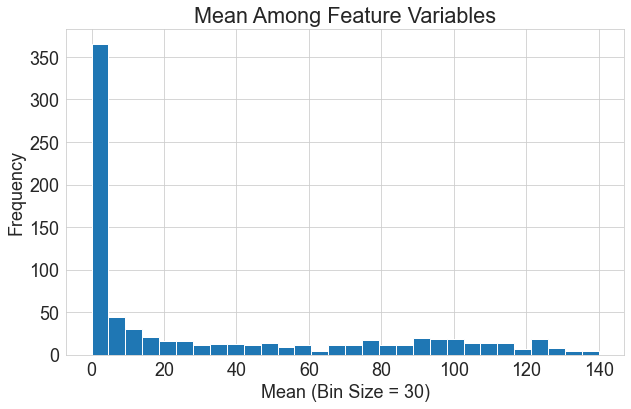

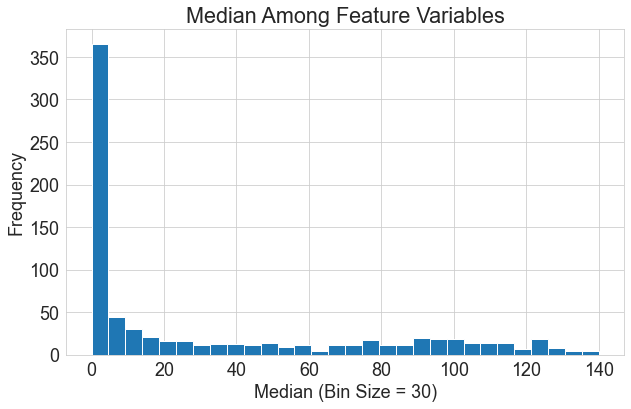

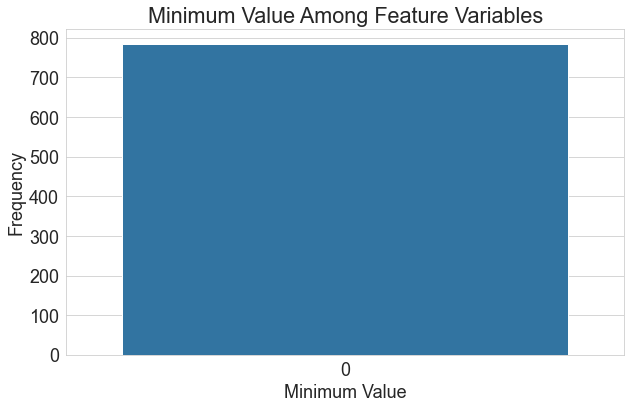

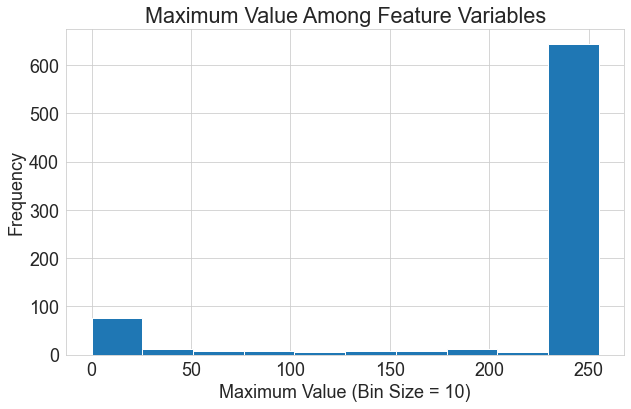

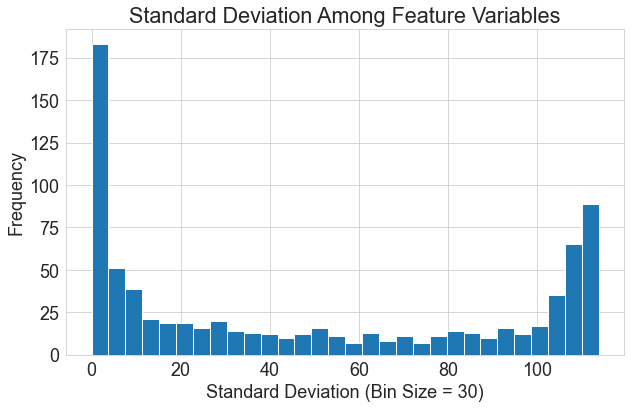

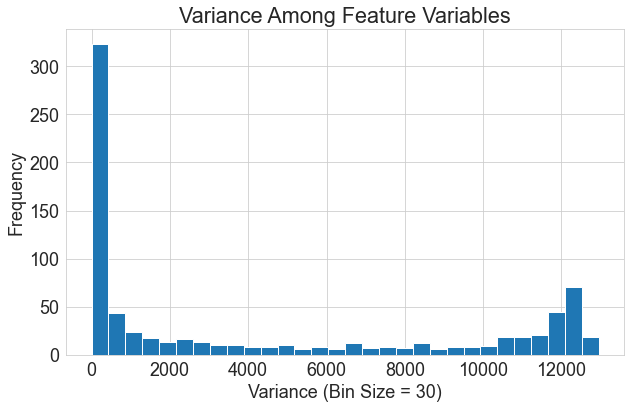

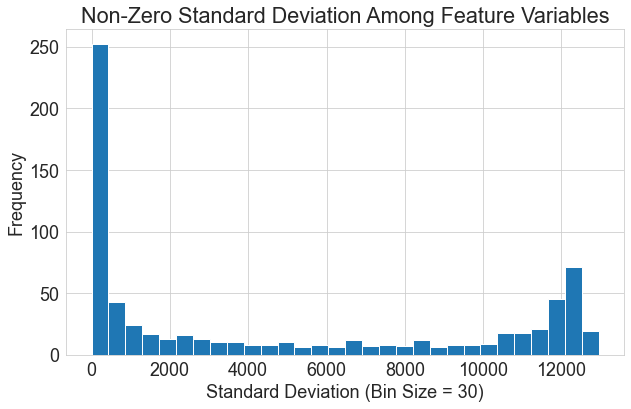

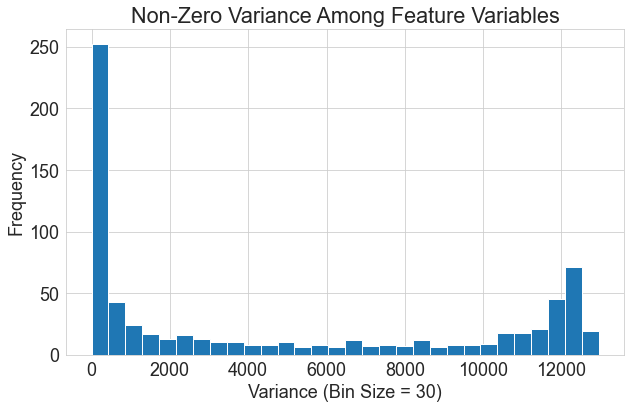

In [4]:
# Histogram of the mean pixel density at each pixel position
plt.subplots(figsize=(10,6))
plt.hist(mean, bins=30)
plt.title('Mean Among Feature Variables')
plt.xlabel('Mean (Bin Size = 30)')
plt.ylabel('Frequency')
plt.show()

# Histogram of the median pixel density at each pixel position
plt.subplots(figsize=(10,6))
plt.hist(median, bins=30)
plt.title('Median Among Feature Variables')
plt.xlabel('Median (Bin Size = 30)')
plt.ylabel('Frequency')
plt.show()

# Bar chart of the minimum pixel density at each pixel position
plt.subplots(figsize=(10,6))
sns.countplot(x=minimum)
plt.title('Minimum Value Among Feature Variables')
plt.xlabel('Minimum Value')
plt.ylabel('Frequency')
plt.show()

# Histogram of the maximum pixel density at each pixel position
plt.subplots(figsize=(10,6))
plt.hist(maximum, bins=10)
plt.title('Maximum Value Among Feature Variables')
plt.xlabel('Maximum Value (Bin Size = 10)')
plt.ylabel('Frequency')
plt.show()

# Histogram of the standard deviation of pixel density at each pixel position (PRE-PRUNING)
plt.subplots(figsize=(10,6))
plt.hist(sd, bins=30)
plt.title('Standard Deviation Among Feature Variables')
plt.xlabel('Standard Deviation (Bin Size = 30)')
plt.ylabel('Frequency')
plt.show()

# Histogram of the variance of pixel density at each pixel position (PRE-PRUNING)
plt.subplots(figsize=(10,6))
plt.hist(variance, bins=30)
plt.title('Variance Among Feature Variables')
plt.xlabel('Variance (Bin Size = 30)')
plt.ylabel('Frequency')
plt.show()

# Histogram of the standard deviation of pixel density at each pixel position (POST-PRUNING)
plt.subplots(figsize=(10,6))
plt.hist(nonzero_sd, bins=30)
plt.title('Non-Zero Standard Deviation Among Feature Variables')
plt.xlabel('Standard Deviation (Bin Size = 30)')
plt.ylabel('Frequency')
plt.show()

# Histogram of the variance of pixel density at each pixel position (POST-PRUNING)
plt.subplots(figsize=(10,6))
plt.hist(nonzero_variance, bins=30)
plt.title('Non-Zero Variance Among Feature Variables')
plt.xlabel('Variance (Bin Size = 30)')
plt.ylabel('Frequency')
plt.show()

# Data Pre-Processing

In [5]:
# Dropping all features with a variance equal to 0 from the MNIST subset training set
for col in df.columns:
    if df.var()[col] == 0:
        df = df.drop(col, axis=1)
df.reset_index(drop=True)

,pix_13,pix_14,pix_15,pix_16,pix_34,pix_35,pix_36,pix_37,pix_38,pix_39,...,pix_771,pix_772,pix_773,pix_774,pix_775,pix_776,pix_777,pix_778,pix_779,pix_780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build the Models

In [ ]:
# Establish training/test sets
xTrain, xTest, yTrain, yTest = train_test_split(df, df_labels, train_size=0.8, test_size=0.2, random_state = 1)

## K-Nearest Neighbors (KNN)

### Establishing K

In [86]:
# Establish a KNN model to call in the for loop
knn = KNeighborsClassifier()

neighbors = list(range(197,204,1)) # List of k values to test
accuracy = [] # List to store mean cross-validated performance
cv = 5 # Number of folds in k-fold cross-validation

# 5-fold cross-validation for optimal k values in KNN model
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    kfold_acc = cross_val_score(knn, xTrain, np.ravel(yTrain), cv = cv)
    accuracy.append(sum(kfold_acc)/cv)
    print("Training with " + str(i) + " neighbors complete. \n")
    
print(accuracy)

Training with 197 neighbors complete. 

Training with 198 neighbors complete. 

Training with 199 neighbors complete. 

Training with 200 neighbors complete. 

Training with 201 neighbors complete. 

Training with 202 neighbors complete. 

Training with 203 neighbors complete. 

[0.90146875, 0.90153125, 0.9011875, 0.9009375000000001, 0.9006562499999999, 0.90053125, 0.90034375]


In [153]:
# Establish a KNN model to call in the for loop
knn = KNeighborsClassifier()

neighbors = list(range(1,11)) # New list of k values to test
accuracy = [] # List to store mean cross-validated performance
cv = 5 # Number of folds in k-fold cross-validation

# 5-fold cross-validation for optimal k values in KNN model
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    kfold_acc = cross_val_score(knn, xTrain, np.ravel(yTrain), cv = cv)
    accuracy.append(sum(kfold_acc)/cv)
    print("Training with " + str(i) + " neighbors complete. \n")
    
print(accuracy)

[0.96346875, 0.9546875, 0.9624375000000001, 0.9605, 0.9614687500000001, 0.9600312500000001, 0.9599062500000001, 0.95875, 0.9585312499999998, 0.9571562499999999]


### Establishing Distance Metric

In [7]:
# Accuracies obtained in previous cell are with Minkowski distance - the default
# distance metric for KNeighborsClassifier()

distance_method = ['euclidean', 'cosine', 'manhattan'] # List of distance metrics to test
distance_accuracy = [] # List to store mean cross-validated performance
cv = 5 5 # Number of folds in k-fold cross-validation

# 5-fold cross-validation for optimal distance metric in KNN model with k = 3
for i in distance_method:
    knn = KNeighborsClassifier(n_neighbors = 3, metric = i)
    kfold_acc = cross_val_score(knn, xTrain, np.ravel(yTrain), cv = cv)
    distance_accuracy.append(sum(kfold_acc)/cv)
print("Finished K = 3. Please wait. \n")

# 5-fold cross-validation for optimal distance metric in KNN model with k = 5
for i in distance_method:
    knn = KNeighborsClassifier(n_neighbors = 5, metric = i)
    kfold_acc = cross_val_score(knn, xTrain, np.ravel(yTrain), cv = cv)
    distance_accuracy.append(sum(kfold_acc)/cv)
print("Finished K = 5. Please wait. \n")

# 5-fold cross-validation for optimal distance metric in KNN model with k = 1
for i in distance_method:
    knn = KNeighborsClassifier(n_neighbors = 1, metric = i)
    kfold_acc = cross_val_score(knn, xTrain, np.ravel(yTrain), cv = cv)
    distance_accuracy.append(sum(kfold_acc)/cv)
print("Finished!")
    
# Your results will be in the order of: 3-Euclidean, 3-Cosine, 3-Manhattan, etc.

Finished K = 3. Please wait. 

Finished K = 5. Please wait.
Finished!


In [8]:
print(distance_accuracy[0]) # Accuracy with K = 3 (Euclidean Distance)
print(distance_accuracy[1]) # Accuracy with K = 3 (Cosine Distance)
print(distance_accuracy[2]) # Accuracy with K = 3 (Manhattan Distance)
print(distance_accuracy[3]) # Accuracy with K = 5 (Euclidean Distance)
print(distance_accuracy[4]) # Accuracy with K = 5 (Cosine Distance)
print(distance_accuracy[5]) # Accuracy with K = 5 (Manhattan Distance)
print(distance_accuracy[6]) # Accuracy with K = 1 (Euclidean Distance)
print(distance_accuracy[7]) # Accuracy with K = 1 (Cosine Distance)
print(distance_accuracy[8]) # Accuracy with K = 1 (Manhattan Distance)

0.9624375000000001
0.96815625
0.9553125000000001
0.9614687500000001
0.96659375
0.9540000000000001
0.96346875
0.9679375
0.95521875


### Build the Optimal KNN Classifier

In [353]:
# KAGGLE SUBMISSION #1

# Build the optimal KNN classifier (K = 3, Distance = Cosine)
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'cosine')
knn.fit(xTrain, np.ravel(yTrain))
predict_y = knn.predict(xTest)
test_accuracy = accuracy_score(yTest, predict_y) # Actual labels for test set vs. Predicted labels for test set

print(predict_y) # The predicted labels for the test set
print(test_accuracy) # Accuracy when predictings the labels in the test set

[4 4 9 ... 1 8 0]
0.96825


In [360]:
# KAGGLE SUBMISSION #2

# Build the optimal KNN classifier (K = 1, Distance = Cosine)
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'cosine')
knn.fit(xTrain, np.ravel(yTrain))
predict_y = knn.predict(xTest)
test_accuracy = accuracy_score(yTest, predict_y) # Actual labels for test set vs. Predicted labels for test set

print(predict_y) # The predicted labels for the test set
print(test_accuracy) # Accuracy when predictings the labels in the test set

[4 4 9 ... 1 8 0]
0.9685


In [366]:
# KAGGLE SUBMISSION #3

# Build the optimal KNN classifier (K = 5, Distance = Cosine)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine')
knn.fit(xTrain, np.ravel(yTrain))
predict_y = knn.predict(xTest)
test_accuracy = accuracy_score(yTest, predict_y) # Actual labels for test set vs. Predicted labels for test set

print(predict_y) # The predicted labels for the test set
print(test_accuracy) # Accuracy when predictings the labels in the test set

[4 4 9 ... 1 8 0]
0.968125


# Decision Tree

### Establishing Tree Depth & Split Criterion

In [347]:
# Build the decision tree classifier
tree = DecisionTreeClassifier()

# Perform 5-fold cross-validation to establish the optimal hyperparameters for the tree model
cv = 5
best_tree = GridSearchCV(tree, {'max_depth': list(range(1,31)), 'criterion': ['entropy','gini']}, cv=cv)
best_tree.fit(xTrain, yTrain)
print(str(best_tree.best_params_))

{'criterion': 'entropy', 'max_depth': 20}


### Build the Optimal Decision Tree Classifier

In [346]:
tree = DecisionTreeClassifier(max_depth = 20, criterion='entropy')
tree.fit(xTrain, yTrain)
predict_y = tree.predict(xTest)
test_accuracy = accuracy_score(yTest, predict_y)

print(predict_y) # The predicted labels for the test set
print(test_accuracy) # Accuracy when predictings the labels in the test set

[9 4 9 ... 1 8 0]
0.85975


# Random Forests

### Establishing Various Hyperparameters

In [16]:
# Build the decision tree classifier
forest = RandomForestClassifier()

# Perform 5-fold cross-validation to establish the optimal hyperparameters for the random forest model
cv = 5
best_forest = GridSearchCV(forest, {'n_estimators': list(range(100, 1100, 100)), 'criterion': ['entropy','gini']}, cv=cv)
best_forest.fit(xTrain, np.ravel(yTrain))
print(str(best_forest.best_params_))

{'criterion': 'gini', 'n_estimators': 400}


In [19]:
forest = RandomForestClassifier(n_estimators = 400, criterion = 'gini')
best_forest = GridSearchCV(forest, {'max_features': ['auto', 'sqrt', 'log2'], "max_depth": list(range(1,31,1))}, cv=cv)
best_forest.fit(xTrain, np.ravel(yTrain))
print(str(best_forest.best_params_))

{'max_depth': 30, 'max_features': 'auto'}


In [39]:
forest = RandomForestClassifier(n_estimators = 400, criterion = 'gini')
best_forest = GridSearchCV(forest, {"max_depth": list(range(30,51,1)), 'bootstrap': [True, False]}, cv=cv)
best_forest.fit(xTrain, np.ravel(yTrain))
print(str(best_forest.best_params_))

{'bootstrap': False, 'max_depth': 36}


In [ ]:
forest = RandomForestClassifier(criterion = 'gini', max_depth = 36, bootstrap = False)
best_forest = GridSearchCV(forest, {'n_estimators': list(range(300, 401, 1))}, cv=cv)
best_forest.fit(xTrain, np.ravel(yTrain))
print(str(best_forest.best_params_))

# NOTE: This cell was accidentally re-evaluated, but originally produced an optimal n_estimators value of 391

In [49]:
forest = RandomForestClassifier(n_estimators = 391, criterion = 'gini', max_depth = 36, bootstrap = False)
best_forest = GridSearchCV(forest, {'min_samples_leaf':[1, 3, 5, 10, 20, 50]}, cv=cv)
best_forest.fit(xTrain, np.ravel(yTrain))
print(str(best_forest.best_params_))

{'min_samples_leaf': 1}


In [85]:
forest = RandomForestClassifier(criterion = 'gini', max_depth = 36, bootstrap = True)
best_forest = GridSearchCV(forest, {'oob_score': [True, False]}, cv=3)
best_forest.fit(xTrain, np.ravel(yTrain))
print(str(best_forest.best_params_))

{'oob_score': False}


### Build the Optimal Random Forests Classifier

In [80]:
# KAGGLE SUBMISSION #4
forest = RandomForestClassifier(n_estimators = 400, criterion='gini',
                               max_depth = 40)
forest.fit(xTrain, np.ravel(yTrain))
predict_y = forest.predict(xTest)
test_accuracy = accuracy_score(yTest, predict_y)

print(predict_y) # The predicted labels for the test set
print(test_accuracy) # Accuracy when predictings the labels in the test set

[4 4 9 ... 1 8 0]
0.96375


In [81]:
# KAGGLE SUBMISSION #5
forest = RandomForestClassifier(n_estimators = 350, criterion='gini',
                               max_depth = 36, bootstrap = False)
forest.fit(xTrain, np.ravel(yTrain))
predict_y = forest.predict(xTest)
test_accuracy = accuracy_score(yTest, predict_y)

print(predict_y) # The predicted labels for the test set
print(test_accuracy) # Accuracy when predictings the labels in the test set

[4 4 9 ... 1 8 0]
0.96725


In [54]:
# KAGGLE SUBMISSION #6
forest = RandomForestClassifier(n_estimators = 391, criterion='gini',
                               max_depth = 36, max_features = 'auto',
                               min_samples_leaf = 1, bootstrap = False)
forest.fit(xTrain, np.ravel(yTrain))
predict_y = forest.predict(xTest)
test_accuracy = accuracy_score(yTest, predict_y)

print(predict_y) # The predicted labels for the test set
print(test_accuracy) # Accuracy when predictings the labels in the test set

[4 4 9 ... 1 8 0]
0.968


# Make Predictions Using the BEST Trained Model

Based on the prediction results on the test set across all methods trained in conjunction with 5-fold cross-validation, the KNN with k = 3 using a cosine similarity metric is suspected to be the optimal classifier for the given test set.

In [36]:
# Read in the test data and predict the test set's labels using the trained K-NN classifier
actual = pd.read_csv('./data/xTest.csv')

# Dropping all features with a variance equal to 0 from the MNIST subset test set
# (Except those that were NOT dropped when training the model)
for col in actual.columns:
    if actual.var()[col] == 0:
        if col not in df:
            actual = actual.drop(col, axis=1)
actual.reset_index(drop=True)
actual = actual.drop('pix_33', axis=1)
actual = actual.drop('pix_52', axis=1)
actual = actual.drop('pix_170', axis=1)
actual.reset_index(drop=True)

,pix_13,pix_14,pix_15,pix_16,pix_34,pix_35,pix_36,pix_37,pix_38,pix_39,...,pix_771,pix_772,pix_773,pix_774,pix_775,pix_776,pix_777,pix_778,pix_779,pix_780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Predict labels in the test set and store it in a variable
    # NOTE: Change knn.predict(actual) to forest.predict(actual) if the suspected
    # optimal classifier uses the random forests method
    # NOTE: Change knn.predict(actual) to tree.predict(actual) if the suspected
    # optimal classifier uses a (non-ensemble) decision tree method
actual_predict = knn.predict(actual) 

In [56]:
# Output the classifier's predictions to a CSV file for competition submission
actual_predict_csv = pd.DataFrame(data=actual_predict, dtype=int)
actual_predict_csv.index.name = 'ID'
actual_predict_csv.columns = ['Category']
actual_predict_csv.to_csv('./data/actual_predict.csv', index=True)